This is fucking awesome!!!!!


So the first line will import all of the rosetta namespace

In [1]:
from rosetta import *

The next line will initialize a rosetta run, pass any options you want as a string, note the example. You only need to do this if you want to run rosetta, not if you want to use the functions

In [ ]:
rosetta.init('-chemical:exclude_patches LowerDNA')

Below you can import a func to download any pdb code. The next line opens the pdb and creates a pose. This will crash occasionally if you do not initialize rosetta with '-ignore_unrecognized_res T' in the above cell.

In [5]:
from toolbox import pose_from_rcsb
pose = pose_from_rcsb("1YY8")

The file 1YY8.pdb already exists; this file will be overwritten.
PDB 1YY8 successfully loaded from the RCSB into 1YY8.pdb.
If the file 1YY8.clean.pdb already exists,it will be overwritten.
PDB 1YY8.pdb successfully cleaned, non-ATOM lines removed.
Clean data written to 1YY8.clean.pdb.


In [6]:
# Look at the pose object
print pose

PDB file name: 1YY8.clean.pdb
Total residues:868
Sequence: DILLTQSPVILSVSPGERVSFSCRASQSIGTNIHWYQQRTNGSPRLLIKYASESISGIPSRFSGSGSGTDFTLSINSVESEDIADYYCQQNNNWPTTFGAGTKLELKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGAQVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLEWLGVIWSGGNTDYNTPFTSRLSINKDNSKSQVFFKMNSLQSNDTAIYYCARALTYYDYEFAYWGQGTLVTVSAASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKRVEPKSDILLTQSPVILSVSPGERVSFSCRASQSIGTNIHWYQQRTNGSPRLLIKYASESISGIPSRFSGSGSGTDFTLSINSVESEDIADYYCQQNNNWPTTFGAGTKLELKRTVAAPSVFIFPPSDEQLKSGTASVVCLLNNFYPREAKVQWKVDNALQSGNSQESVTEQDSKDSTYSLSSTLTLSKADYEKHKVYACEVTHQGLSSPVTKSFNRGAQVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLEWLGVIWSGGNTDYNTPFTSRLSINKDNSKSQVFFKMNSLQSNDTAIYYCARALTYYDYEFAYWGQGTLVTVSAASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKRVEPKS
Fold tree:
FOLD_TREE  EDGE 1 213 -1  EDGE 1 214 1  EDGE 214 434 -1  EDGE

In [9]:
print pose.chi?

In [16]:
#loop over the 1st 20 residues and print the psi angles of the backbone
for i in xrange(1,20):
    print pose.psi(i)

152.567475706
129.25872242
129.992731389
128.994120913
119.194901448
138.258179471
150.074511696
176.966242023
-37.0807218508
126.383481706
113.027830118
127.574437971
166.141536574
147.388090674
142.921803993
-26.8481465428
156.94593008
132.932556527
150.636071482


Anytime you want to watch the protein as you operate on it, add the pymol mover. First create it, then apply it. Everytime you change the protein, make sure to reapply or update or send the data to pymol, otherwise you may not see it change in pymol

In [17]:
pymover = PyMOL_Mover() 
pymover.apply(pose)
scorefxn = get_fa_scorefxn() 
scorefxn(pose) 
pymover.send_energy(pose)    
pymover.keep_history(True) 

Here, we loop over all residues and get the psi angle, then we add some noise and score it. As you watch in pymol, the colors will change to red when we make angles that are bad.

In [26]:
import random
import time

for i in xrange( 1,pose.n_residue() ):
    store_psi = pose.psi(i)
    pose.set_psi(i,store_psi+10*random.random())
    scorefxn(pose)
    pymover.send_energy(pose)
    #time.sleep(5)

KeyboardInterrupt: 

In [21]:
print pose.set_psi?

In [29]:
#print pose.set_psi
print pose.energies()

 res         fa_atr         fa_rep         fa_sol   fa_intra_rep        fa_elec      pro_close    hbond_sr_bb    hbond_lr_bb    hbond_bb_sc       hbond_sc      dslf_fa13           rama          omega         fa_dun        p_aa_pp            ref
   1         -0.566          0.016          0.397          1.370          0.156          0.000          0.000          0.000          0.000          0.000          0.000          0.000          0.003          5.150          0.000         -1.287
   2         -1.175          0.193          0.598          5.076          0.034          0.000          0.000          0.000          0.000          0.000          0.000         -0.793          0.046          2.547         -0.064          0.832
   3         -1.538          0.231          0.955          1.702         -0.197          0.000          0.000          0.000          0.000          0.000          0.000         -0.604          0.015          1.549         -0.533          0.602
   4         -1.506 

In [23]:
import random
print random.random?

In [24]:
print random.random()

0.730864694655


In [31]:
print core.scoring.func.GaussianFunc(0,1)

         r      func     dfunc dfunc_est
         2     2.919     2.000     2.000
       2.5     4.044     2.500     2.500
         3     5.419     3.000     3.000
       3.5     7.044     3.500     3.500
         4     8.919     4.000     4.000
       4.5    11.044     4.500     4.500
         5    13.419     5.000     5.000
       5.5    16.044     5.500     5.500
         6    18.919     6.000     6.000
       6.5    22.044     6.500     6.500
         7    25.419     7.000     7.000
       7.5    29.044     7.500     7.500
         8    32.919     8.000     8.000
       8.5    37.044     8.500     8.500
         9    41.419     9.000     9.000
       9.5    46.044     9.500     9.500
        10    50.919    10.000    10.000
      10.5    56.044    10.500    10.500
        11    61.419    11.000    11.000
      11.5    67.044    11.500    11.500
        12    72.919    12.000    12.000
      12.5    79.044    12.500    12.500
        13    85.419    13.000    13.000
      13.5    92

The different functions we can use for constraints are in core.scoring.func

Here, we get a range of x values (for plotting) and create a gaussian function with a mean 0 and a sd of 1. Once we create the function, we can pass our values of x to it and it will return the f(x) value.

In [40]:
import numpy as np
x = np.linspace(-5,5)

In [41]:
gausdata = core.scoring.func.GaussianFunc(0,1)

Until we figure out a better way to do this, it seems we must loop over the x values to get them. This creates a dictionary with the key being the x value and the dict[key] equal to the y value.

In [49]:
y = dict()
for i in x:
    y[i] = gausdata.func(i)

In order to plot this, I like storing all of my data in a pandas data frame. Here we import the pandas library and create a frame from the dictionary. We set the index to y, (still a little hacky and unclean)

In [61]:
import pandas as pd
df = pd.DataFrame(y, index = ['y'])

I'm transposing the dataframe into a direction I like (where the columns are the x and y values, and I import matplotlib to plot my data

In [62]:
df =  df.T
import matplotlib.pyplot as plt
%matplotlib inline

I'm creating a new column named x so I can access it the way I want. This can be avoided by creating the dictionary slightly differently

In [71]:
df['x'] = df.index
print df.head()

                   y         x
x                             
-5.000000  13.418938 -5.000000
-4.795918  12.419355 -4.795918
-4.591837  11.461420 -4.591837
-4.387755  10.545136 -4.387755
-4.183673   9.670500 -4.183673


Plot this mf-er!

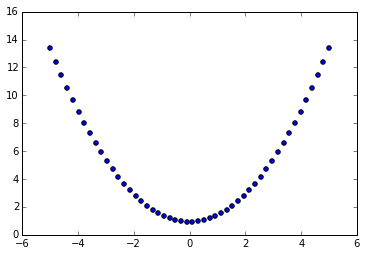

In [72]:
plt.scatter(df.x,df.y)